In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, FloatSlider

import tensorflow as tf
import tensorflow.keras.backend as K

# Layers for training
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Lambda, concatenate
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import metrics

# Losses for training
from tensorflow.keras import losses

# Data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

C:\Users\88693\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\88693\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\88693\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\88693\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

## 讀取mnist資料集&整理資料

In [2]:
(x_train, y_train),(x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

# one-hot encoding
y_train_n及w = to_categorical(y_train, 10)
y_test_new = to_categorical(y_test, 10)

In [4]:
model_encoder_1 = Dense(128, activation='sigmoid')
model_encoder_2 = Dense(100, activation='sigmoid')

model_encoder_mean = Dense(2)
model_encoder_log_var = Dense(2)

model_decoder_3 = Dense(32, activation='sigmoid')
model_decoder_2 = Dense(256, activation='sigmoid')
model_decoder_1 = Dense(784, activation='sigmoid')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
#定義
x = Input(shape=(784,))
model_encoder_x = model_encoder_2(model_encoder_1(x))

z_mean = model_encoder_mean(model_encoder_x)
z_log_var = model_encoder_log_var(model_encoder_x)

In [7]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [8]:
z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

In [9]:
z_input = Input(shape=(2,))
x_hat = model_decoder_1(model_decoder_2(model_decoder_3(z_input)))

In [10]:
x_hat = model_decoder_1(model_decoder_2(model_decoder_3((z))))

VAE = Model(x, x_hat)
VAE.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          100480      input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          12900       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            202         dense_1[0][0]                    
______________________________________________________________________________________________

## loss 函數

In [11]:
reconstruction_loss = 784 * losses.mean_squared_error(x, x_hat)

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = K.mean(reconstruction_loss + kl_loss)

VAE.add_loss(vae_loss)

VEA

In [12]:
VAE.compile(optimizer=Adam())

In [17]:
VAE.fit(x_train, 
        batch_size=256, 
        epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 85us/sample - loss: 56.6598
Epoch 2/15
60000/60000 [==============================] - 4s 65us/sample - loss: 52.8072
Epoch 3/15
60000/60000 [==============================] - 4s 63us/sample - loss: 51.2483
Epoch 4/15
60000/60000 [==============================] - 4s 63us/sample - loss: 49.8311
Epoch 5/15
60000/60000 [==============================] - 4s 67us/sample - loss: 49.2472
Epoch 6/15
60000/60000 [==============================] - 4s 65us/sample - loss: 48.6351
Epoch 7/15
60000/60000 [==============================] - 4s 64us/sample - loss: 48.0634
Epoch 8/15
60000/60000 [==============================] - 4s 62us/sample - loss: 46.5129
Epoch 9/15
60000/60000 [==============================] - 4s 63us/sample - loss: 45.6711
Epoch 10/15
60000/60000 [==============================] - 4s 62us/sample - loss: 45.3384
Epoch 11/15
60000/60000 [==============================] - 4s 63us/sample - loss: 44.8712
Epoch 12/15
60000/6

In [19]:
# vea的視覺化
VAE_Encoder = Model(x, z_mean)
VAE_Encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 113,582
Trainable params: 113,582
Non-trainable params: 0
_________________________________________________________________


In [20]:
idx = np.random.randint(x_train.shape[0])
print(f"第 {idx} 圖 latent ： {VAE_Encoder.predict(x_train[idx: idx+1]).squeeze()}")

第 28879 圖 latent ： [-1.0742483  -0.29498374]


In [21]:
indices = np.random.randint(x_train.shape[0], size=3000)
VAE_latents = VAE_Encoder.predict(x_train[indices])

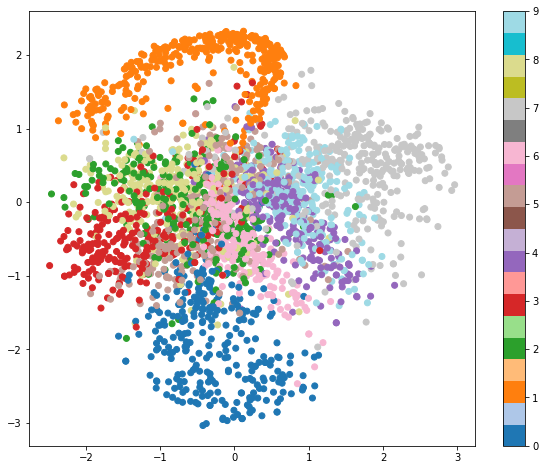

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(VAE_latents[:, 0], VAE_latents[:, 1], c=y_train[indices], cmap='tab20')
plt.colorbar()
plt.show()

In [24]:
#decoder的視覺化

z_input = Input(shape=(2,))


In [26]:
VAE_Decoder = Model(z_input, model_decoder_1(model_decoder_2(model_decoder_3(z_input))))

VAE_Decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               201488    
Total params: 210,032
Trainable params: 210,032
Non-trainable params: 0
_________________________________________________________________


In [27]:
def normalized(x):
    x -= x.min()
    x /= x.max()
    return x

In [28]:
n = 20
digit_size = 28

grid_x_vae = np.linspace(-4+0.05, 4-0.05, n)
grid_y_vae = np.linspace(-4+0.05, 4-0.05, n)
VAE_figure = np.zeros((digit_size * n, digit_size * n))
for i, yi in enumerate(grid_x_vae):
    for j, xi in enumerate(grid_y_vae):
        z_sample = np.array([[xi, yi]])
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        VAE_figure[(n-i-1) * digit_size: (n - i) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = normalized(digit)

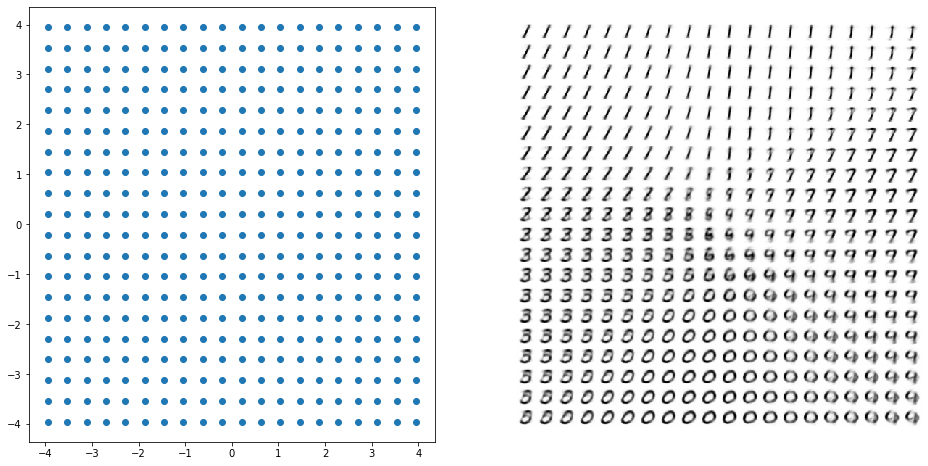

In [29]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
XXX, YYY = np.meshgrid(grid_x_vae, grid_y_vae)
plt.scatter(XXX, YYY)

plt.subplot(1, 2, 2)
plt.imshow(VAE_figure, cmap='Greys')
plt.axis('off')
plt.show()